# multiprocessing test
## multiprocessing.Poolを使用する例
- with Pool(os.cpu_count()) as p:


In [ ]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count 
from tqdm import tqdm 
from glob import glob
from multiprocess_test import wrap_save_npy

p = Pool(processes=cpu_count()-1)
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays/'
# フォルダ作成
if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)

path_list = glob('icopng/*.png')
print(path_list)
for path in path_list:
    print(path)
job_args = [(path, path.split('.')[1], i) for i,path in enumerate(path_list)]

for result in p.imap_unordered(wrap_save_npy, job_args):
    print(result)


- imap_unorderedだけでもデッドロック
- 別ファイル化が必要

In [ ]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count 
from tqdm import tqdm 
from glob import glob


p = Pool(processes=cpu_count()-1)
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays/'
# フォルダ作成
if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)


def wrap_save_npy(args):
    return save_npy(*args)


def save_npy(path, type_name):

    #pngデータをopencvでロード
    im = cv2.imread(path)
    #pngのファイル名 + フォルダ名を.npyファイルのファイル名にする
    file_name = path.split('\\')[-1].split('.png')[0]
    save_path = save_base_path + file_name + '_' + type_name
    #全てのnpyファイルを同じフォルダに格納
    np.save(save_path, im)
    return save_path

path_list = glob('icopng/*.png')
print(path_list)
for path in path_list:
    print(path)
job_args = [(path, path.split('.')[1]) for path in path_list]
# wrap_save_npy([path_list[0],'test'])
#list(tqdm(p.imap(wrap_save_npy, job_args), total=len(path_list)))
# p.imap(wrap_save_npy, job_args)

for result in p.imap_unordered(wrap_save_npy, job_args):
    print(result)


- joinではデッドロックになる
= 別ファイルでの実行が必要

In [ ]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count 
from tqdm import tqdm 
from glob import glob

p = Pool(processes=cpu_count()-1)
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays/'
# フォルダ作成
if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)


def wrap_save_npy(args):
    return save_npy(*args)


def save_npy(path, type_name):

    #pngデータをopencvでロード
    im = cv2.imread(path)
    #pngのファイル名 + フォルダ名を.npyファイルのファイル名にする
    file_name = path.split('\\')[-1].split('.png')[0]
    save_path = save_base_path + file_name + '_' + type_name
    #全てのnpyファイルを同じフォルダに格納
    np.save(save_path, im)

path_list = glob('icopng/*.png')
print(path_list)
for path in path_list:
    print(path)
job_args = [(path, path.split('.')[1]) for path in path_list]
# wrap_save_npy([path_list[0],'test'])
#list(tqdm(p.imap(wrap_save_npy, job_args), total=len(path_list)))
p.imap(wrap_save_npy, job_args)

p.close()
p.join()


# multiprocessing無し CPUバウンド

In [2]:

import time

from  process_cpubound_one_by_one import wrap_calc, calc
CPU_COUNT = 1
TIMES = 1
N = 500



job_args = [(i, N) for i in range(TIMES)]
# print(wrap_calc((2, 100)))
# print(calc(2, 100))
start = time.time()
for result in map(wrap_calc, job_args):
    pass
    # print(result)
print(time.time()-start)


17.747177839279175


- TIMES = 3
N = 150
4.456254720687866
- TIMES = 100
N = 150
145.21500158309937
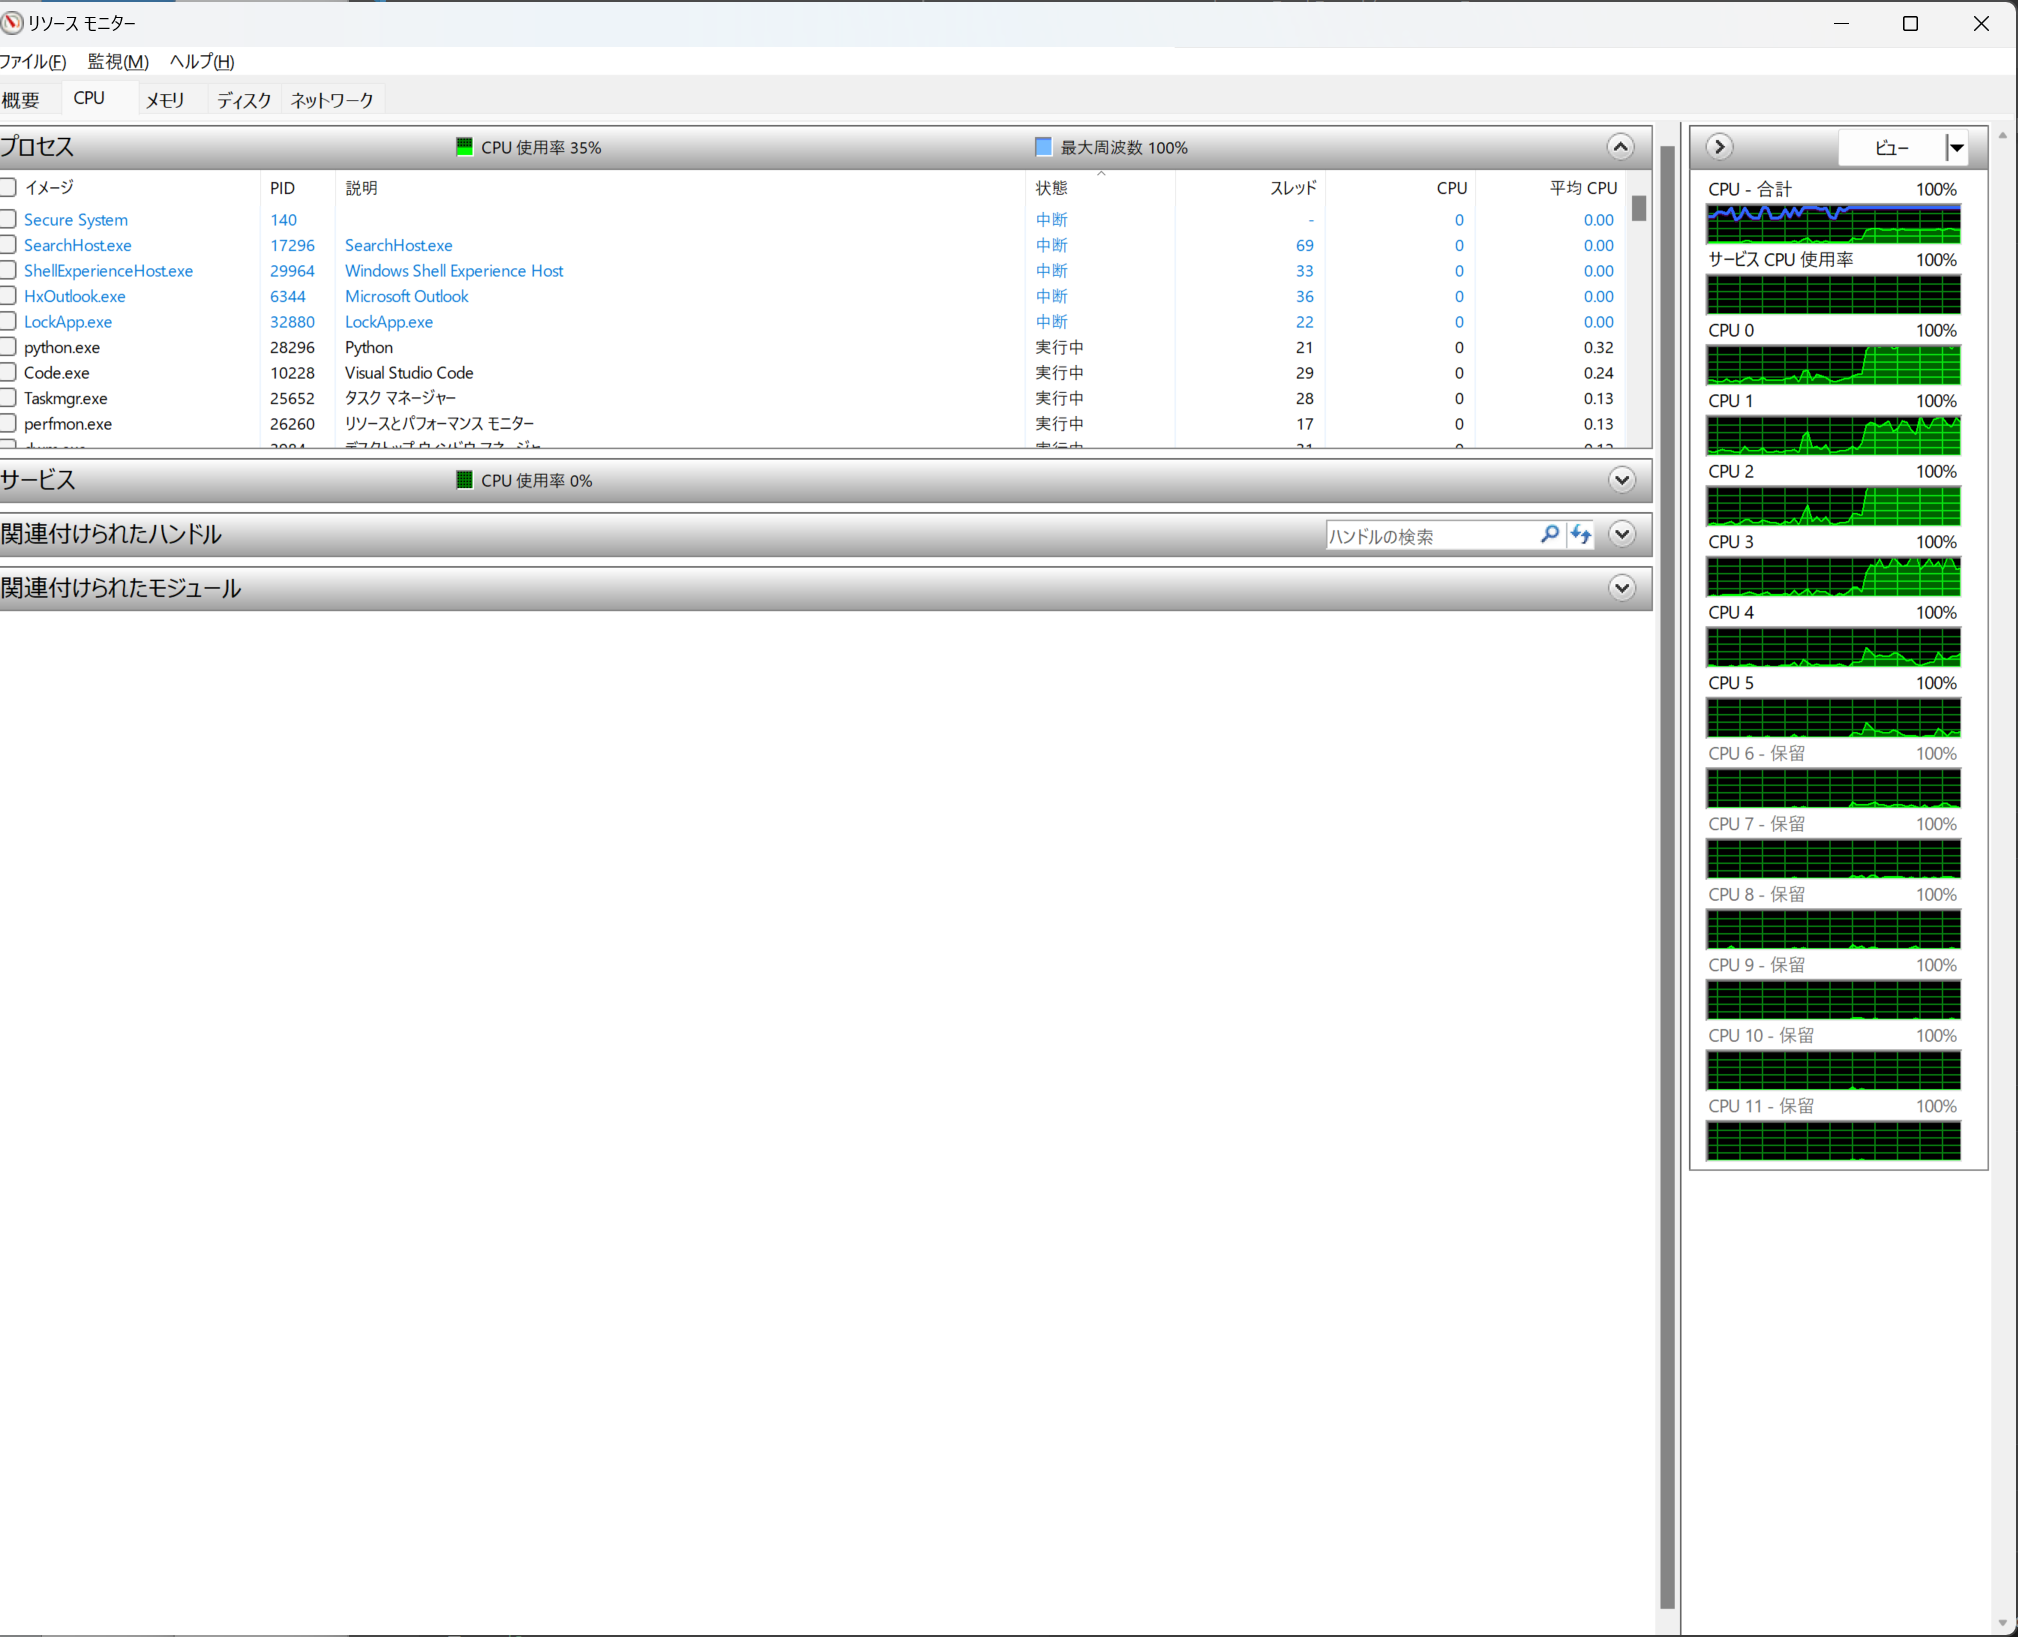
- N = 120
0.5649542808532715

TIMES = 1
N = 150
1.4359354972839355
TIMES = 1
N = 200
2.6348965167999268
TIMES = 5
N = 300
29.120726823806763
- TIMES = 1
N = 500
17.747177839279175

# multiprocess + imap_unordered　CPUバウンド処理

In [1]:
from multiprocessing import Pool
import time

from  process_cpubound_one_by_one import wrap_calc, calc
CPU_COUNT = 2
TIMES = 1
N = 500

p = Pool(processes=CPU_COUNT)


job_args = [(i, N) for i in range(TIMES)]
# print(wrap_calc((2, 100)))
# print(calc(2, 100))
start = time.time()
for result in p.imap_unordered(wrap_calc, job_args):
    pass
    # print(result)
print(time.time()-start)



(-5.564119008301246e-13, 1.0016646062983636e-07, -0.006734487219195822, 200.46981864461995, 2017274.5148496374)
23.938422918319702


- CPU_COUNT = 1
TIMES = 1
N = 150
7.5394251346588135
- CPU_COUNT = 1
TIMES = 2
N = 150
8.94335126876831
- CPU_COUNT = 1
TIMES = 5
N = 150
13.387527704238892

###一回の計算内でプロセスを増やす
- CPU_COUNT = 1
TIMES = 1
N = 500
23.809459686279297
- CPU_COUNT = 2
TIMES = 1
N = 500
23.938422918319702
- 変わらず

- CPU_COUNT = 1
TIMES = 100
N = 150
148.71924448013306
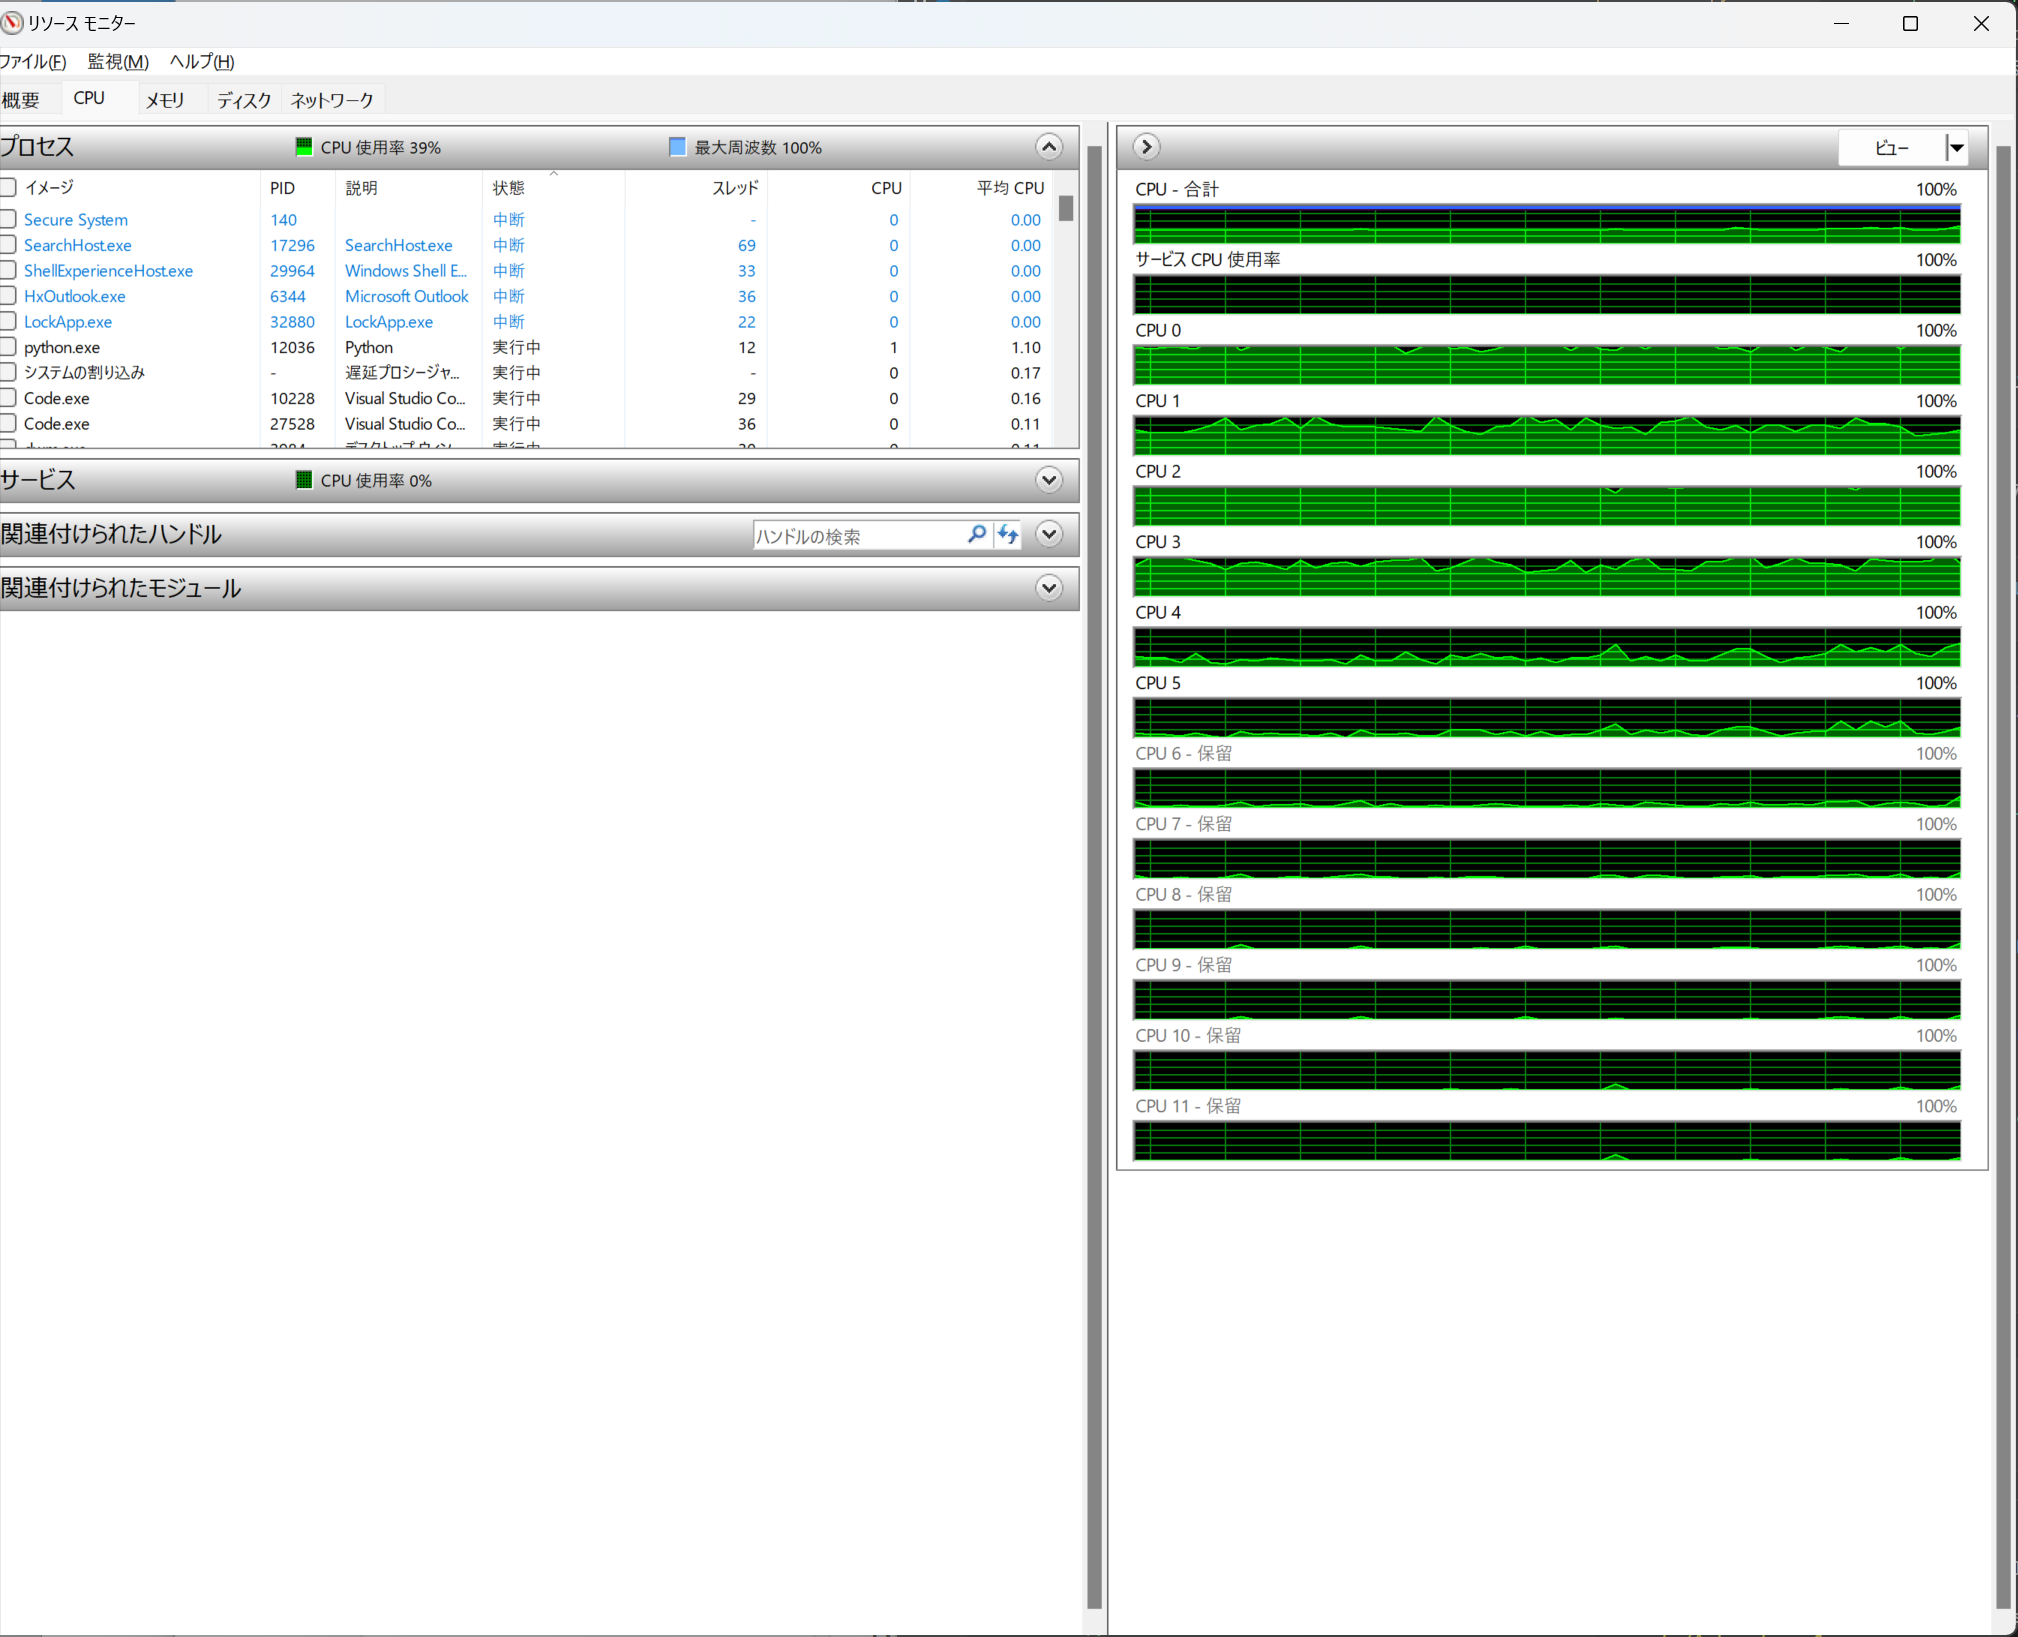
- CPU_COUNT = 3
TIMES = 100
N = 150
53.40702223777771
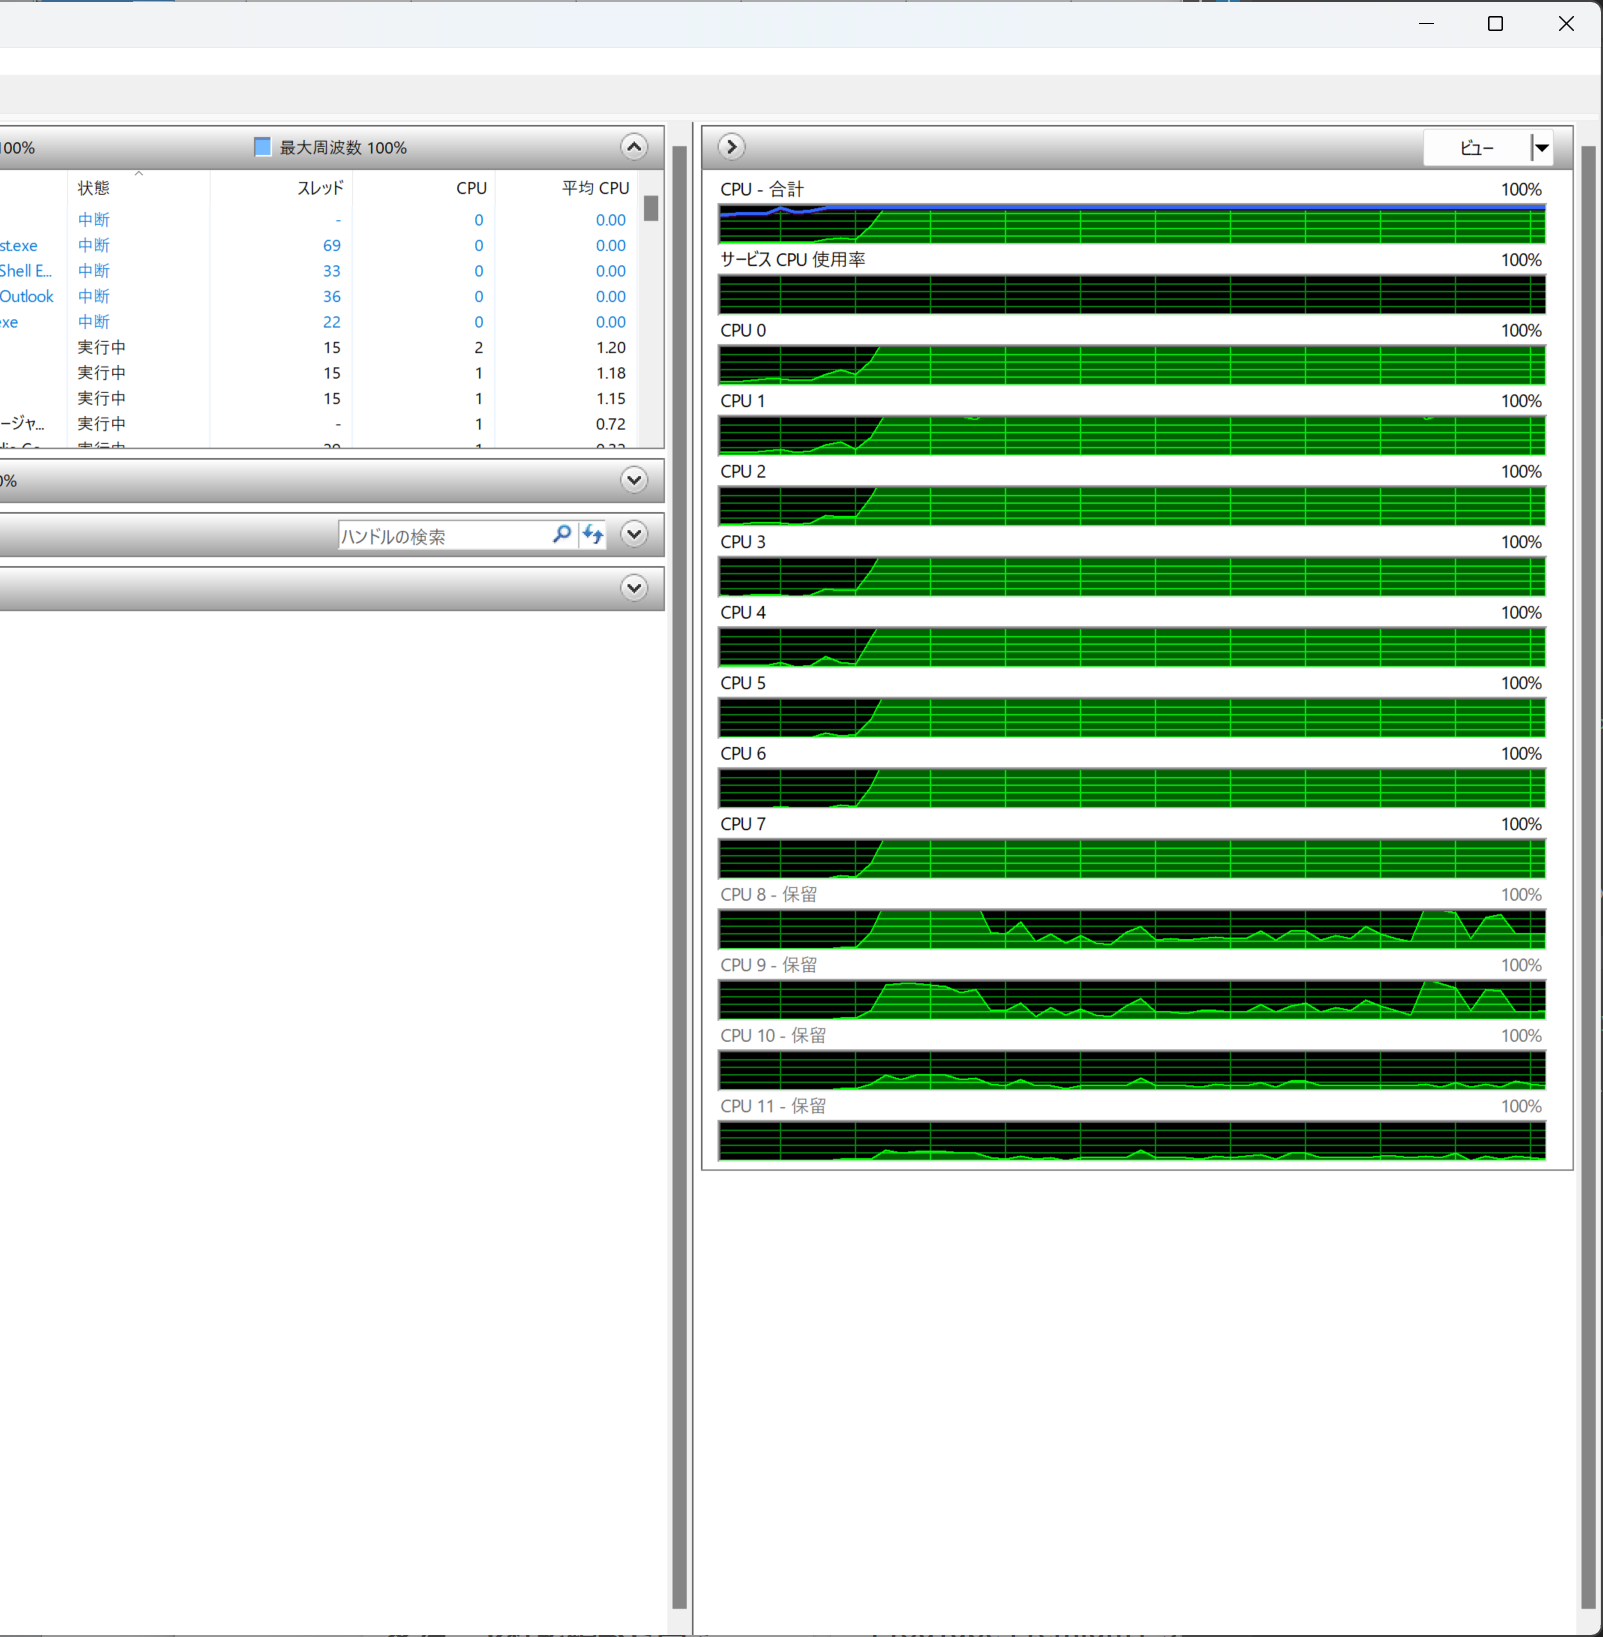
- CPU_COUNT = 6
TIMES = 100
N = 150
27.18010640144348
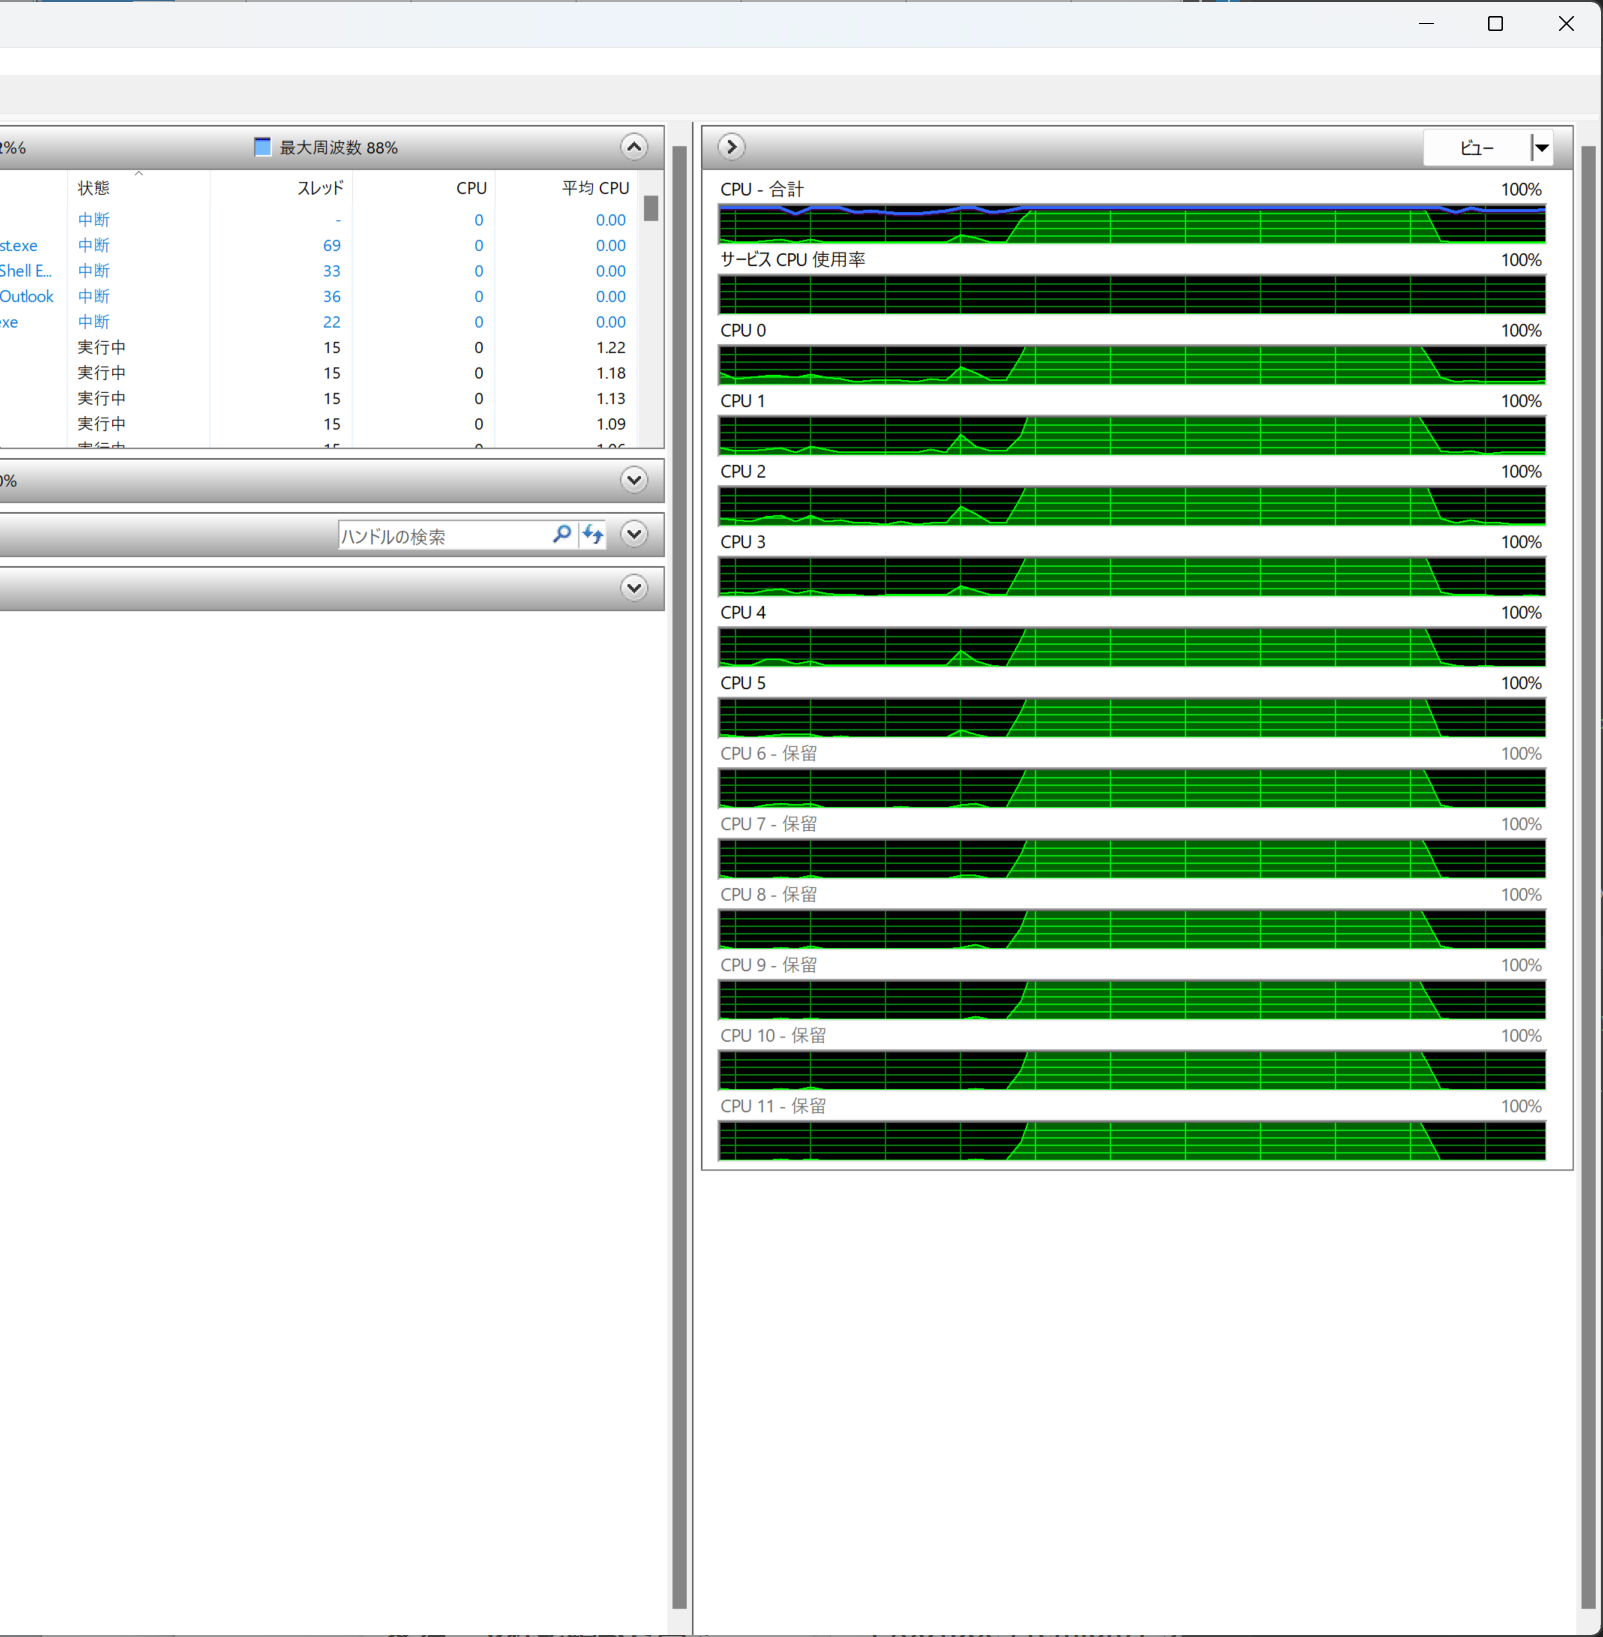
- CPU_COUNT = 9
TIMES = 100
N = 150
27.239501953125
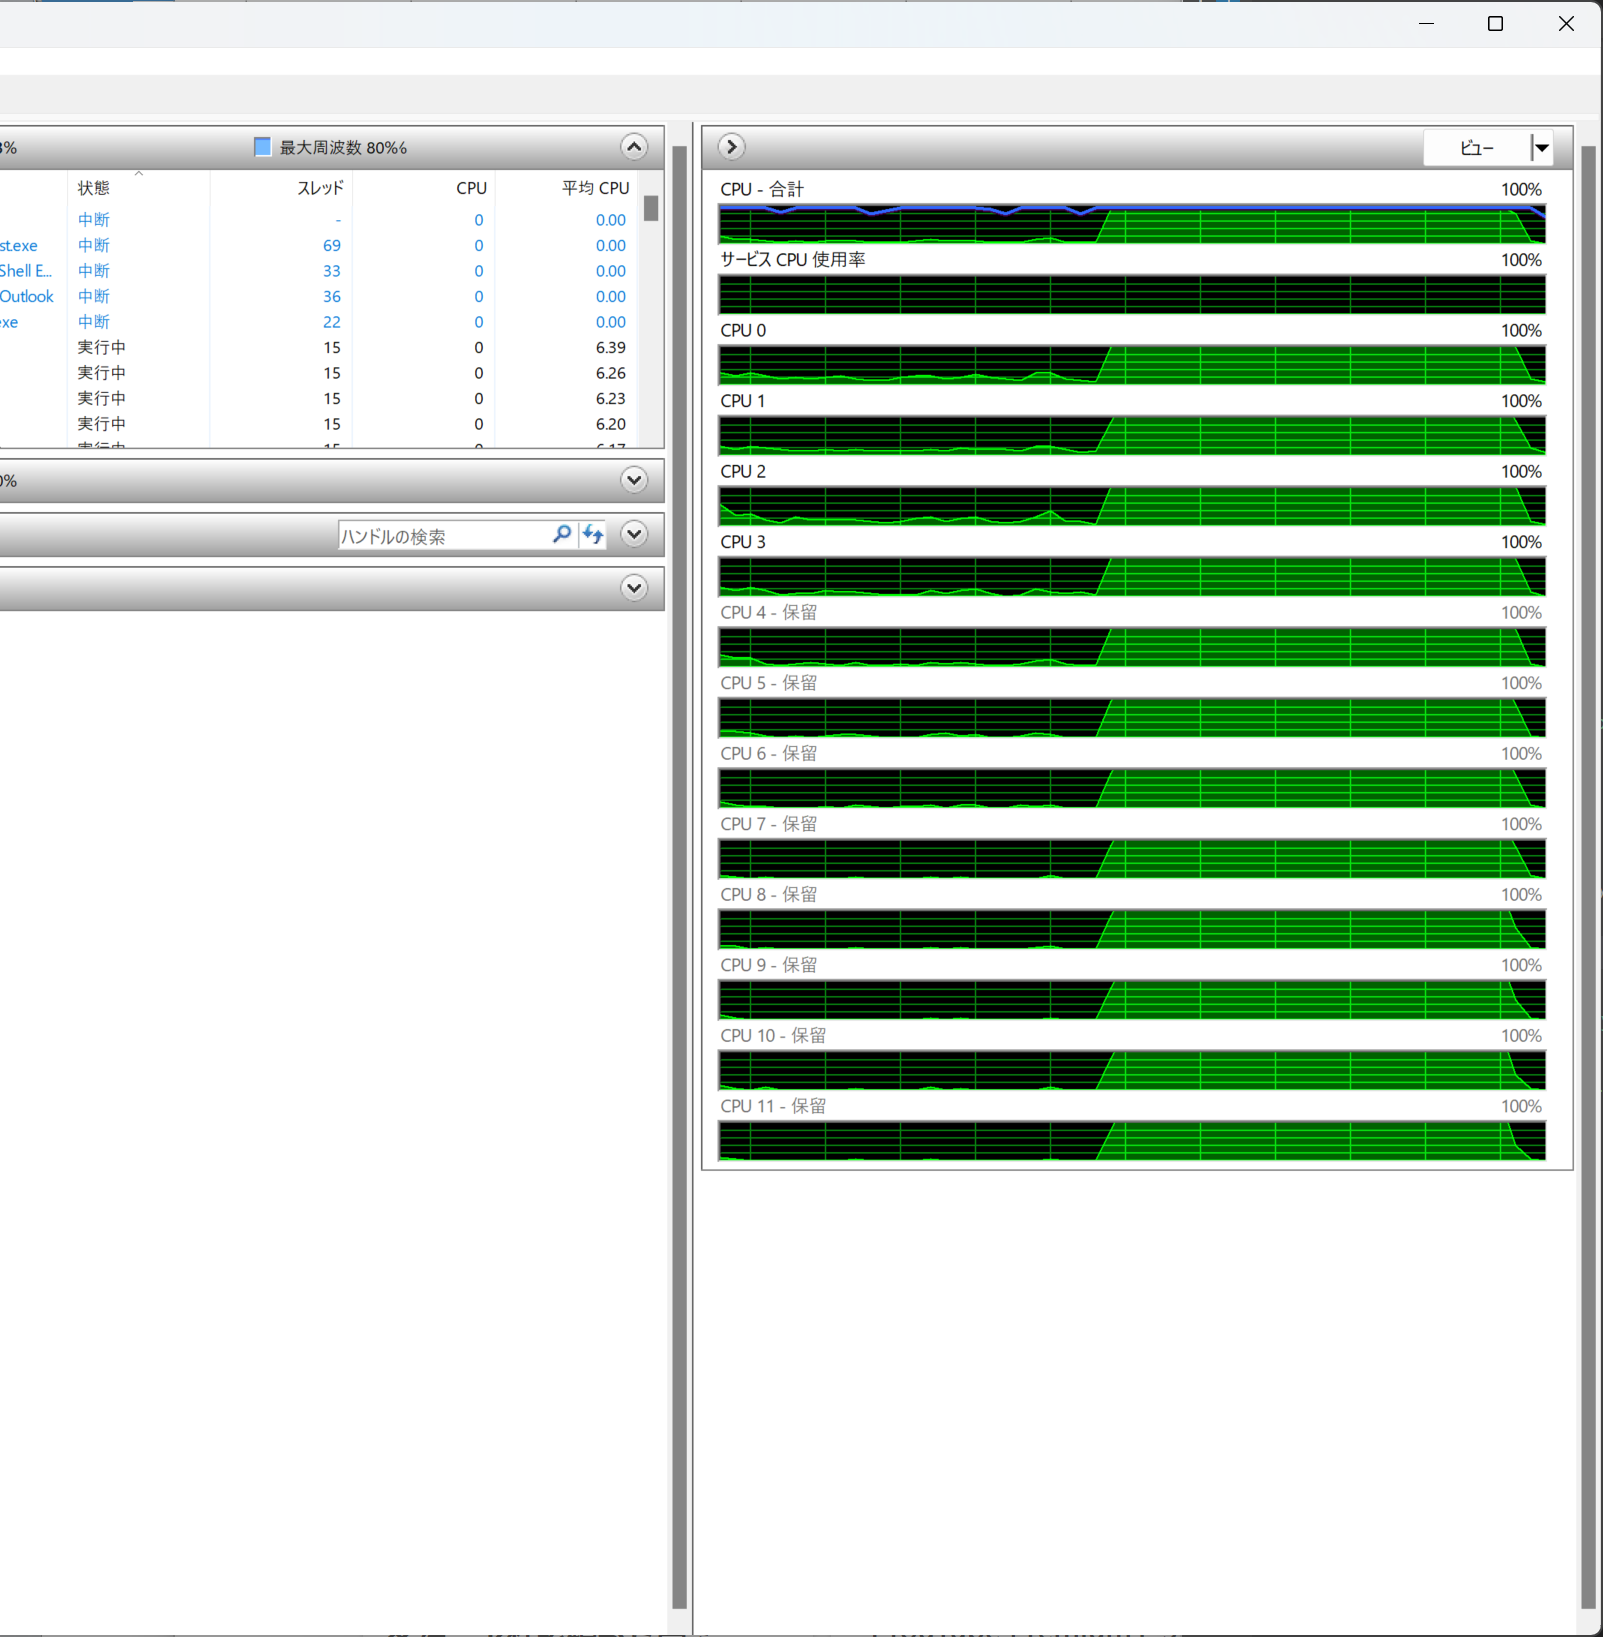
- CPU_COUNT = 1
TIMES = 100
N = 120
62.33948731422424
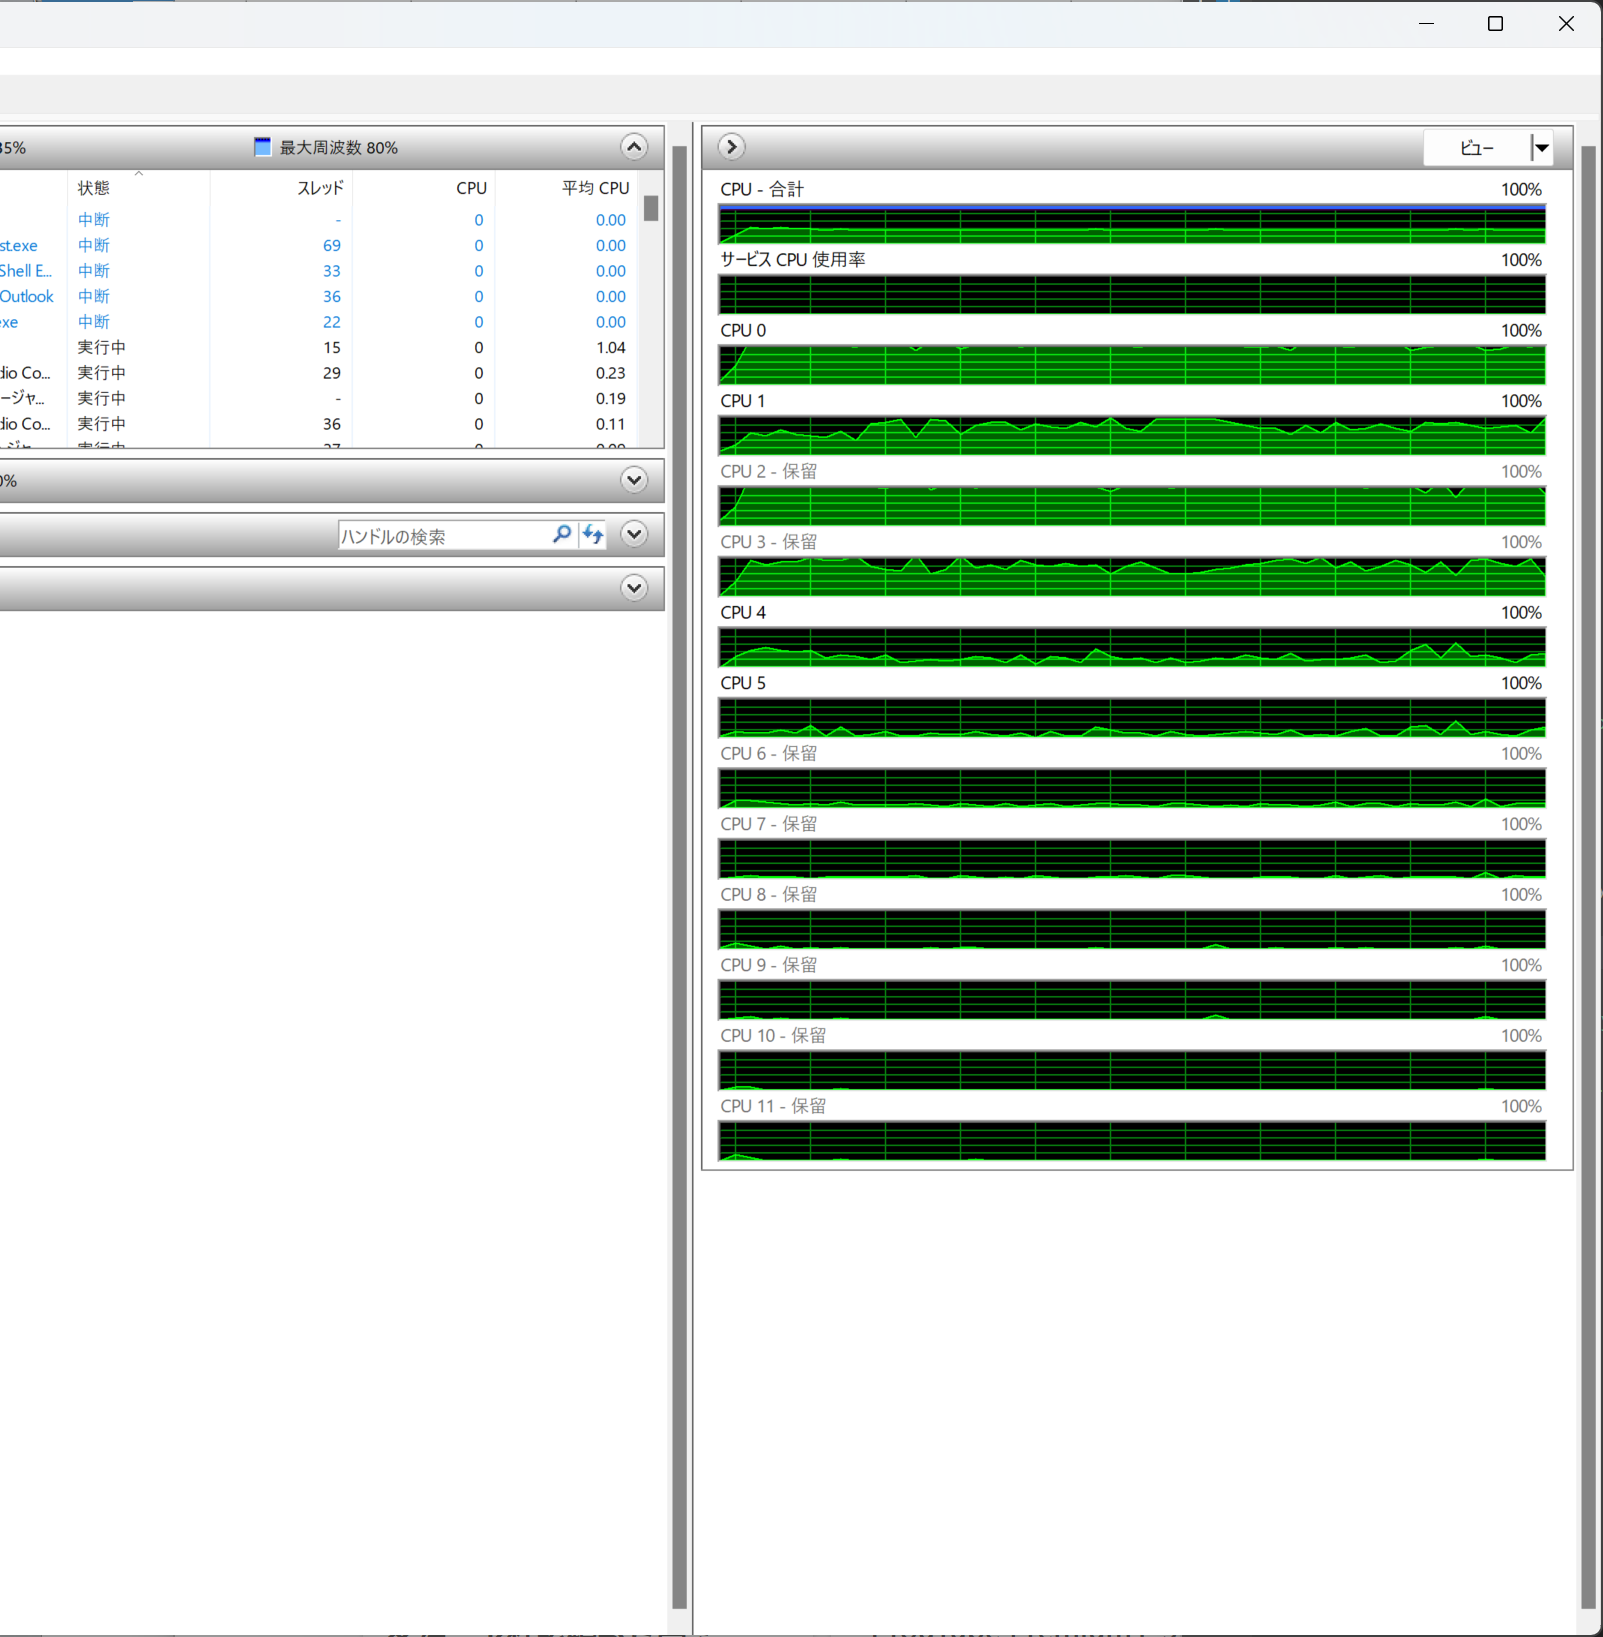
- CPU_COUNT = 3
TIMES = 100
N = 120
25.138277292251587
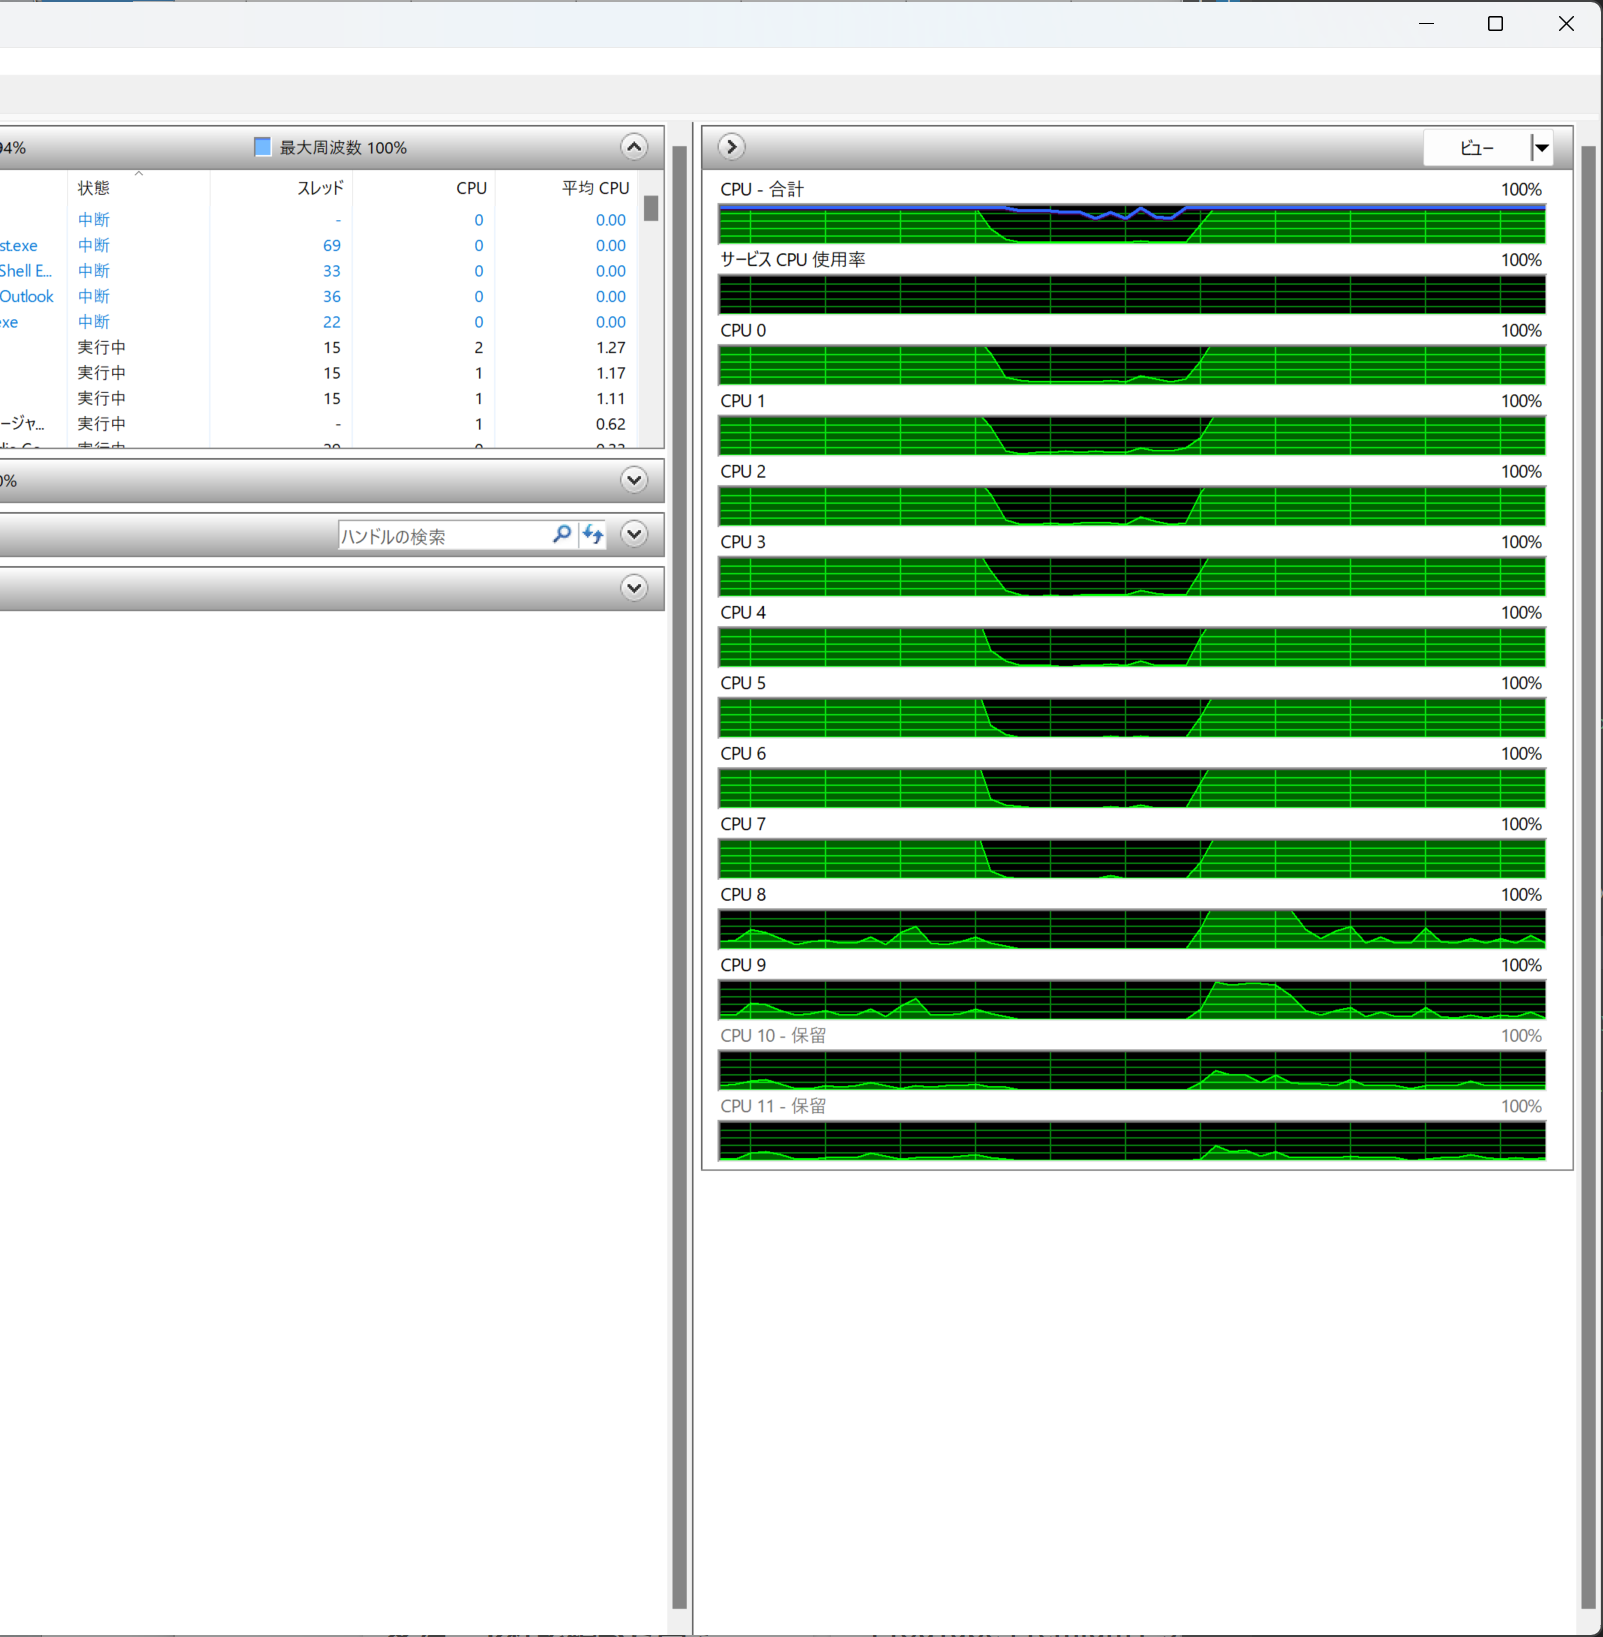
- CPU_COUNT = 6
TIMES = 100
N = 120
14.731799602508545
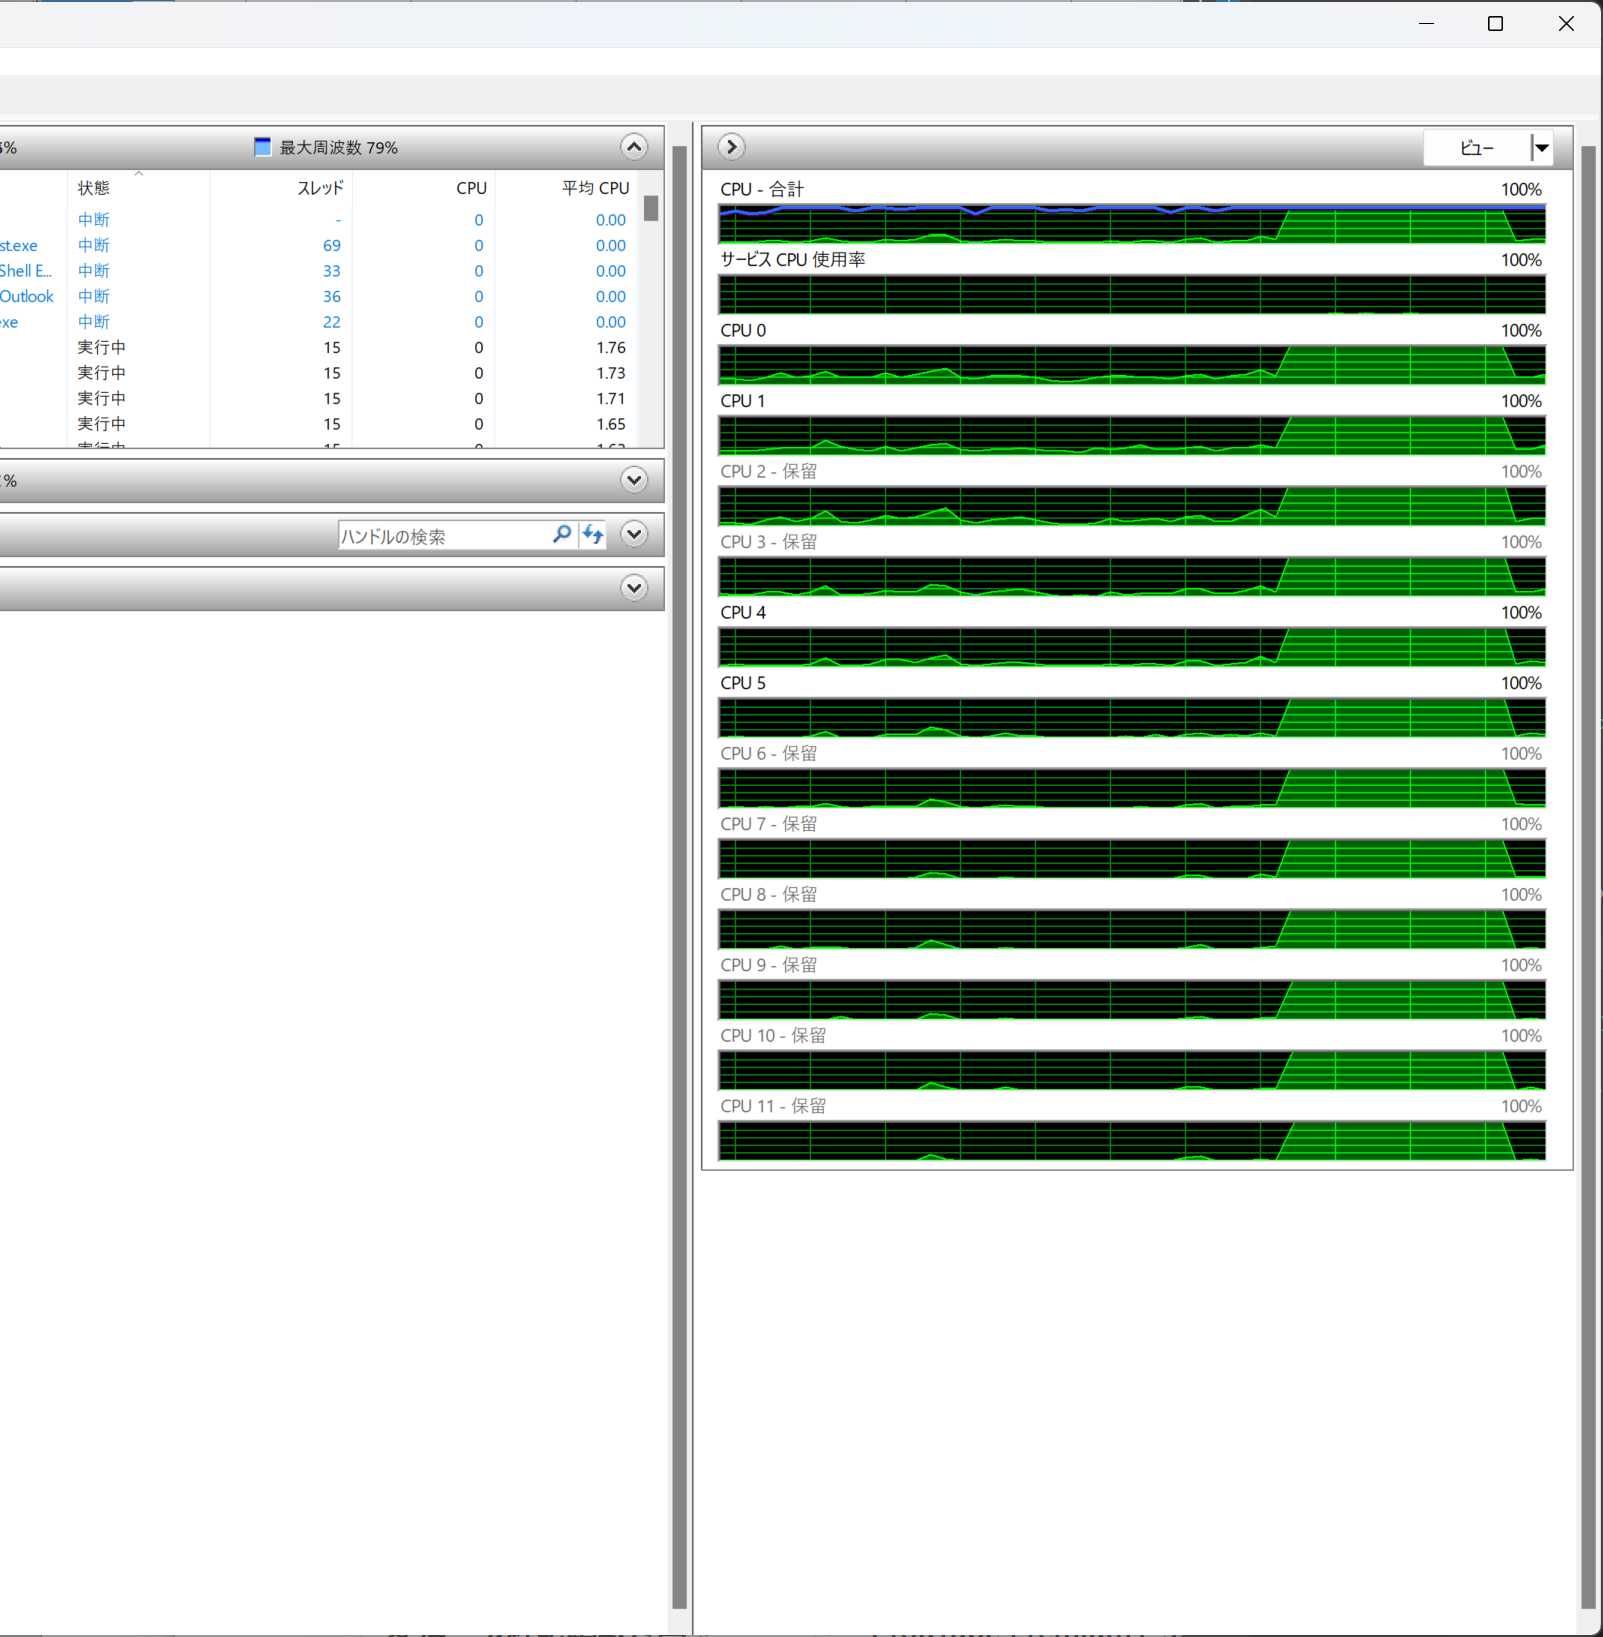
- CPU_COUNT = 9 遅くなる
TIMES = 100
N = 120
15.965711832046509
- CPU_COUNT = 6
TIMES = 24
N = 200
15.11379075050354
- prevent over-subscription
結果が出力できていない
CPU_COUNT = 6
TIMES = 100
N = 120
2.9975311756134033




#### lambda関数の戻り値を持つプロセスのエラー

In [ ]:
from multiprocessing import Pool
import time

from  process_cpubound_one_by_one_lambda import wrap_calc, calc
CPU_COUNT = 2
TIMES = 2
N = 200

p = Pool(processes=CPU_COUNT)

start = time.time()
job_args = [(i, N) for i in range(TIMES)]
# print(wrap_calc((2, 100)))
# print(calc(2, 100))
for result in p.imap_unordered(wrap_calc, job_args):
    pass
    # print(result)
print(time.time()-start)



(-3.951525978085274e-12, defaultdict(<function calc.<locals>.<lambda> at 0x00000287C8417240>, {}), 1.015979272196685e-07, -0.006802351763541587, 200.9100844527583, 2019311.8071557013)


MaybeEncodingError: Error sending result: '(0.0, defaultdict(<function calc.<locals>.<lambda> at 0x0000020459878720>, {}), 0.0, 0.0, 0.0, 0.0)'. Reason: 'AttributeError("Can't pickle local object 'calc.<locals>.<lambda>'")'

### プロセスに渡す引数をコアごとにひとまとまりで

In [3]:
from multiprocessing import Pool
import time
import numpy as np

from  process_cpubound_block import wrap_calc
# from  process_cpubound_block_prevent_OverSubscription import wrap_calc


CPU_COUNT = 6
TIMES = 100
N = 120

p = Pool(processes=CPU_COUNT)
As_list = np.array_split([i for i in range(TIMES)], CPU_COUNT)
job_args = [(As, N) for As in As_list]

start = time.time()
# print(wrap_calc((2, 100)))
# print(calc(2, 100))
for result in p.imap_unordered(wrap_calc, job_args):
    pass
    # print(result)
print(time.time()-start)



[[0.0, 0.0, 0.0, 0.0, 0.0], [-0.0003927383101972694, 0.019524067729351415, -0.33167682168071866, 2.0734773216112026, 6.712977369923323]]
1.1296985149383545


In [1]:
from multiprocessing import Pool
import time
import numpy as np

from  process_cpubound_block import wrap_calc
# from  process_cpubound_block_prevent_OverSubscription import wrap_calc


CPU_COUNT = 6
TIMES = 100
N = 120

p = Pool(processes=CPU_COUNT)
As_list = np.array_split([i for i in range(TIMES)], CPU_COUNT)
job_args = [(As, N) for As in As_list]

start = time.time()
# print(wrap_calc((2, 100)))
# print(calc(2, 100))
for result in p.imap_unordered(wrap_calc, job_args):
    pass
    # print(result)
print(time.time()-start)



[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0001015330984023847, -0.0063138190327130675, 0.07604980950699122, 0.2967742502629936, 6.667310750706056]]
8.933588027954102


- CPU_COUNT = 3
TIMES = 100
N = 120
19.03568696975708
- CPU_COUNT = 6
TIMES = 100
N = 120
8.939052104949951
- prevent over-subscription
結果が出力できていない
CPU_COUNT = 6
TIMES = 100
N = 120
1.2542612552642822

In [1]:
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np
import time

from  process_cpubound_one_by_one import wrap_calc
CPU_COUNT = 1
TIMES = 5
N = 300

def wrap_calc(args):
    return calc(*args)

def calc(A, n):

    a = np.random.random((n, n))

    b = np.random.random((n, n))
    c = np.dot(a, b).reshape([n*n])

    g = [gauss(i, a=A, mu=n*n/2, sigma=n*n/8) for i in range(n*n)]

    # ガウシアンとのコンボリューション
    conv =  np.convolve(c, g, mode='same')
    
    # x軸の定義
    x =  np.array([i for i in range(n*n)])

    #4次関数でのフィッティング
    f1, f2, f3, f4, f5 = np.polyfit(x, conv, 4)
    return f1, f2, f3, f4, f5
    # fit = [func(i, f1, f2, f3, f4, f5) for i in x]

def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

# def func(x, f1, f2, f3, f4, f5):
#     return f1*x**4+f2*x**3+f3*x**2+f4*x+f5

wrap_calc((2, 300))





(-5.775875032611074e-13, 1.0356961112966149e-07, -0.00688195629334998, 201.5745764137503, 2012106.9753287619)


(-5.629879136751658e-13,
 1.0137646997097933e-07,
 -0.006787325030979105,
 200.48206531153352,
 2023727.815590124)

- mapのテスト

In [ ]:
from glob import glob
path_list = glob('icopng/*.png')
print(path_list)
results = [0 for _ in range(len(path_list))]
numbers = [i for i in range(len(path_list))]
map_list = [[i, path] for i, path in enumerate(path_list)]
print(map_list)

def sep(*args):
    print(args)
    print(f'n,f = {args[0][0]},{args[0][1]}')
    return f'n,f = {args[0][0]},{args[0][1]}'
for a in list(map(sep, map_list)):
    print(a)